In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
route='data/revisions'

In [28]:
def get_all_df(route):
    result={}
    cvs=os.listdir(route)
    coron=[]
    pandemic=[]
    country=[]
    for i in cvs:
        path=os.path.join(route,i)
        df=pd.read_csv(path)
        if "Corona" in i:
            coron.append(df)
        elif 'country' in i:
            country.append(df)
        else:
            pandemic.append(df)
    result['Coronavirus']=pd.concat(coron,ignore_index=True)
    result['COVID-19_pandemic_by_country']=pd.concat(country, ignore_index=True)
    result['COVID-19_pandemic']=pd.concat(pandemic, ignore_index=True)
    return result

In [29]:
result=get_all_df(route)

In [60]:
def get_user_activities(result, output):
    if not os.path.exists(output):
        os.makedirs(output)
    top10_percentage={}
    top100_percentage={}
    for i in result.keys():
        savefile=i+'_user_pie.png'
        outfile=os.path.join(output,savefile)
        user_freq=result[i]['user'].value_counts()
        user_10=user_freq.sort_values(ascending=False).head(10)
        plt.figure()
        user_10.plot.pie(title=i+'_user_pie')
        plt.savefig(outfile)
        plt.close()
        user_100=user_freq.sort_values(ascending=False).head(100)
        top100_percentage[i]=user_100.sum()/len(result[i])
        top10_percentage[i]=user_10.sum()/len(result[i])
    df=pd.Series(top10_percentage)
    outdf='top10_user_percentage.csv'
    outdffile=os.path.join(output, outdf)
    df.to_csv(outdffile)
    df2=pd.Series(top100_percentage)
    outdf2='top100_user_percentage.csv'
    outdf2file=os.path.join(output, outdf2)
    df2.to_csv(outdf2file)
    bar1=os.path.join(output, 'top10_editor.png')
    bar2=os.path.join(output, 'top100_editor.png')
    plt.figure()
    plt.bar(x=df.index, height=df.values)
    plt.xticks(rotation=90)
    plt.xlabel('article')
    plt.ylabel('percentage')
    plt.title('top10_editor_percentage')
    plt.savefig(bar1, bbox_inches='tight')
    plt.close()
    plt.figure()
    plt.bar(x=df2.index, height=df2.values)
    plt.xticks(rotation=90)
    plt.xlabel('article')
    plt.ylabel('percentage')
    plt.title('top100_editor_percentage')
    plt.savefig(bar2, bbox_inches='tight')
    plt.close()
       
       
    return

In [61]:
get_user_activities(result, 'data/result')

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [91]:
def LDA(result, output):
    for i in result.keys():
        section=result[i]['comment']
        tfidf=TfidfVectorizer(stop_words='english')
        tf=tfidf.fit_transform(section.dropna())
        lda=LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
        lda.fit(tf)
        name=tfidf.get_feature_names()
        title=i+'_topics_in_LDA_model'
        plot_top_words(lda, name,20, title,output)
        
    
    return

In [65]:
tfidf=TfidfVectorizer(stop_words='english')

In [67]:
tf=tfidf.fit_transform(result['Coronavirus']['comment'].dropna())

In [83]:
lda=LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [84]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [85]:
name=tfidf.get_feature_names()

In [86]:
lda.components_

array([[0.20458103, 0.19046829, 0.33893555, ..., 0.36144913, 0.33813076,
        0.33247325],
       [0.17717189, 0.19212751, 0.18191869, ..., 0.18521453, 0.17339435,
        0.18484324],
       [0.19719731, 0.17367683, 0.19486922, ..., 0.18225775, 0.18177655,
        0.17001638],
       ...,
       [0.18226346, 0.19574729, 0.17013708, ..., 0.19960345, 0.18531059,
        0.18283092],
       [0.17235515, 0.16204719, 0.19533122, ..., 0.20091503, 0.18058947,
        0.1895356 ],
       [0.58581506, 0.19749025, 0.19135466, ..., 0.19358583, 0.18911638,
        0.18762358]])

In [89]:
def plot_top_words(model, feature_names, n_top_words, title,output):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    outfile=os.path.join(output, title+'.png')
    plt.savefig(outfile)
    plt.show()
    plt.close()
    return



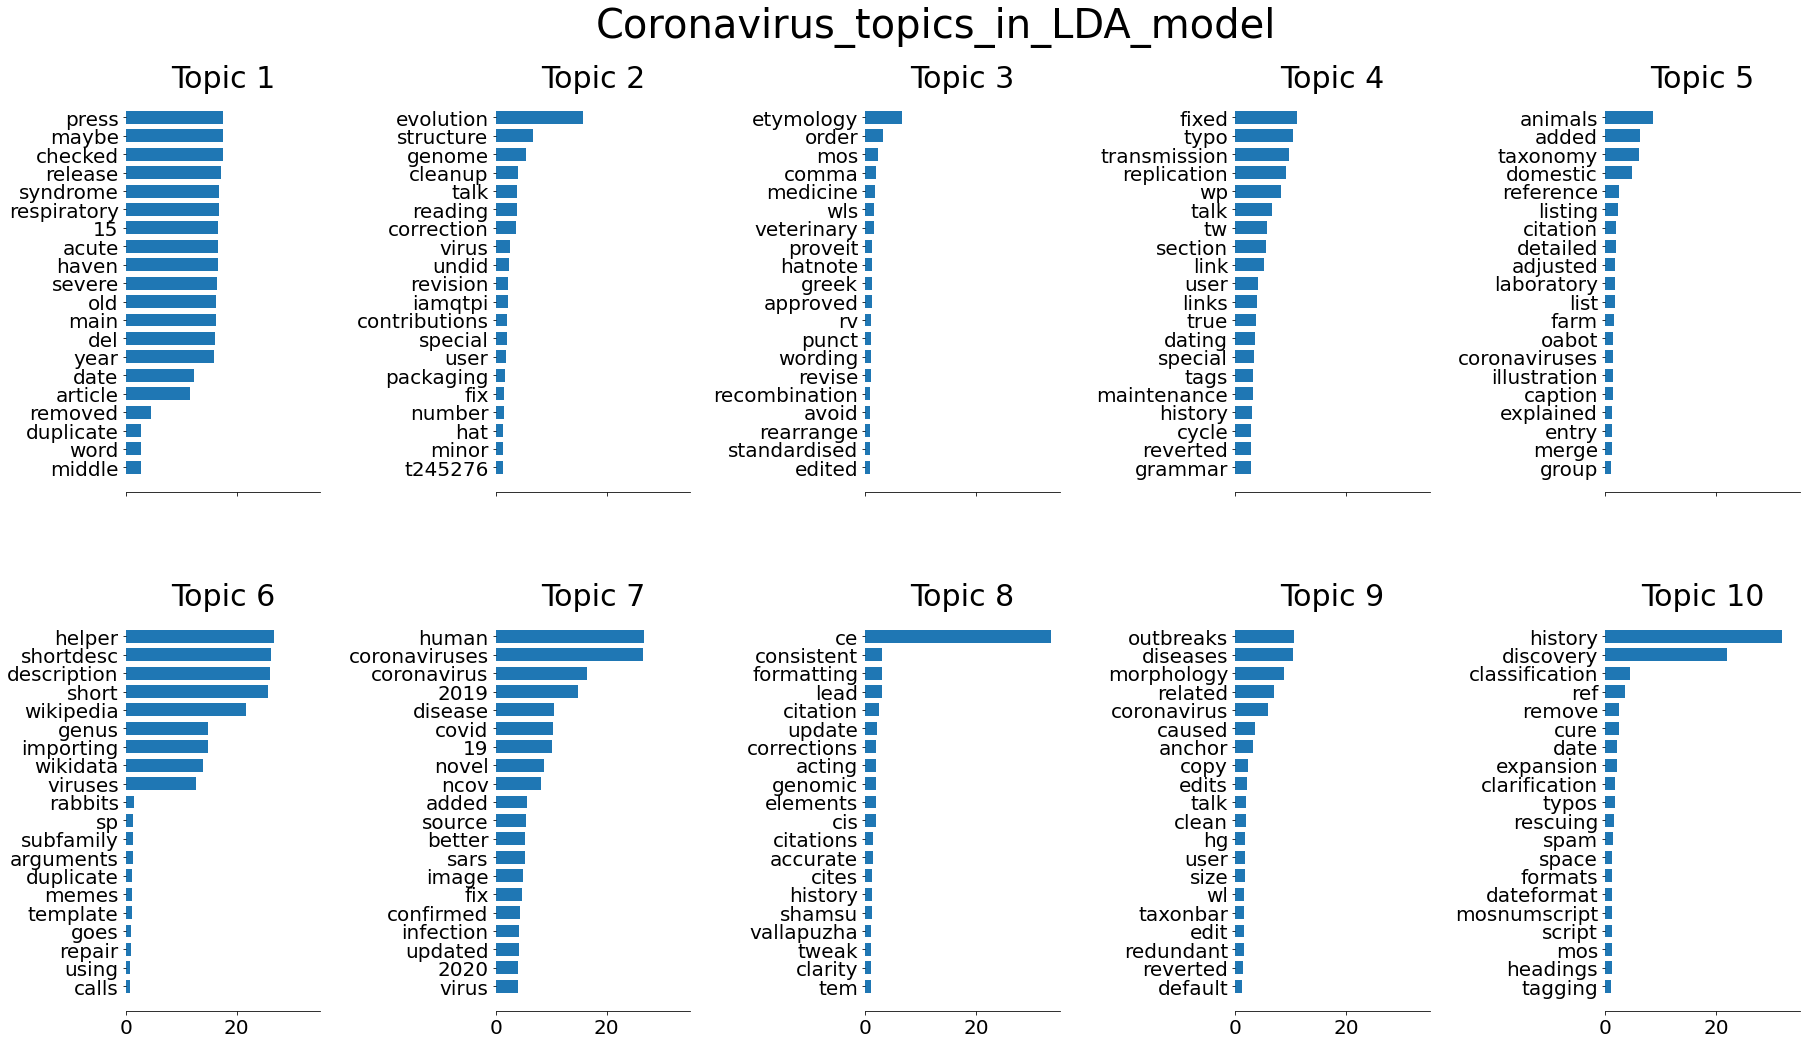

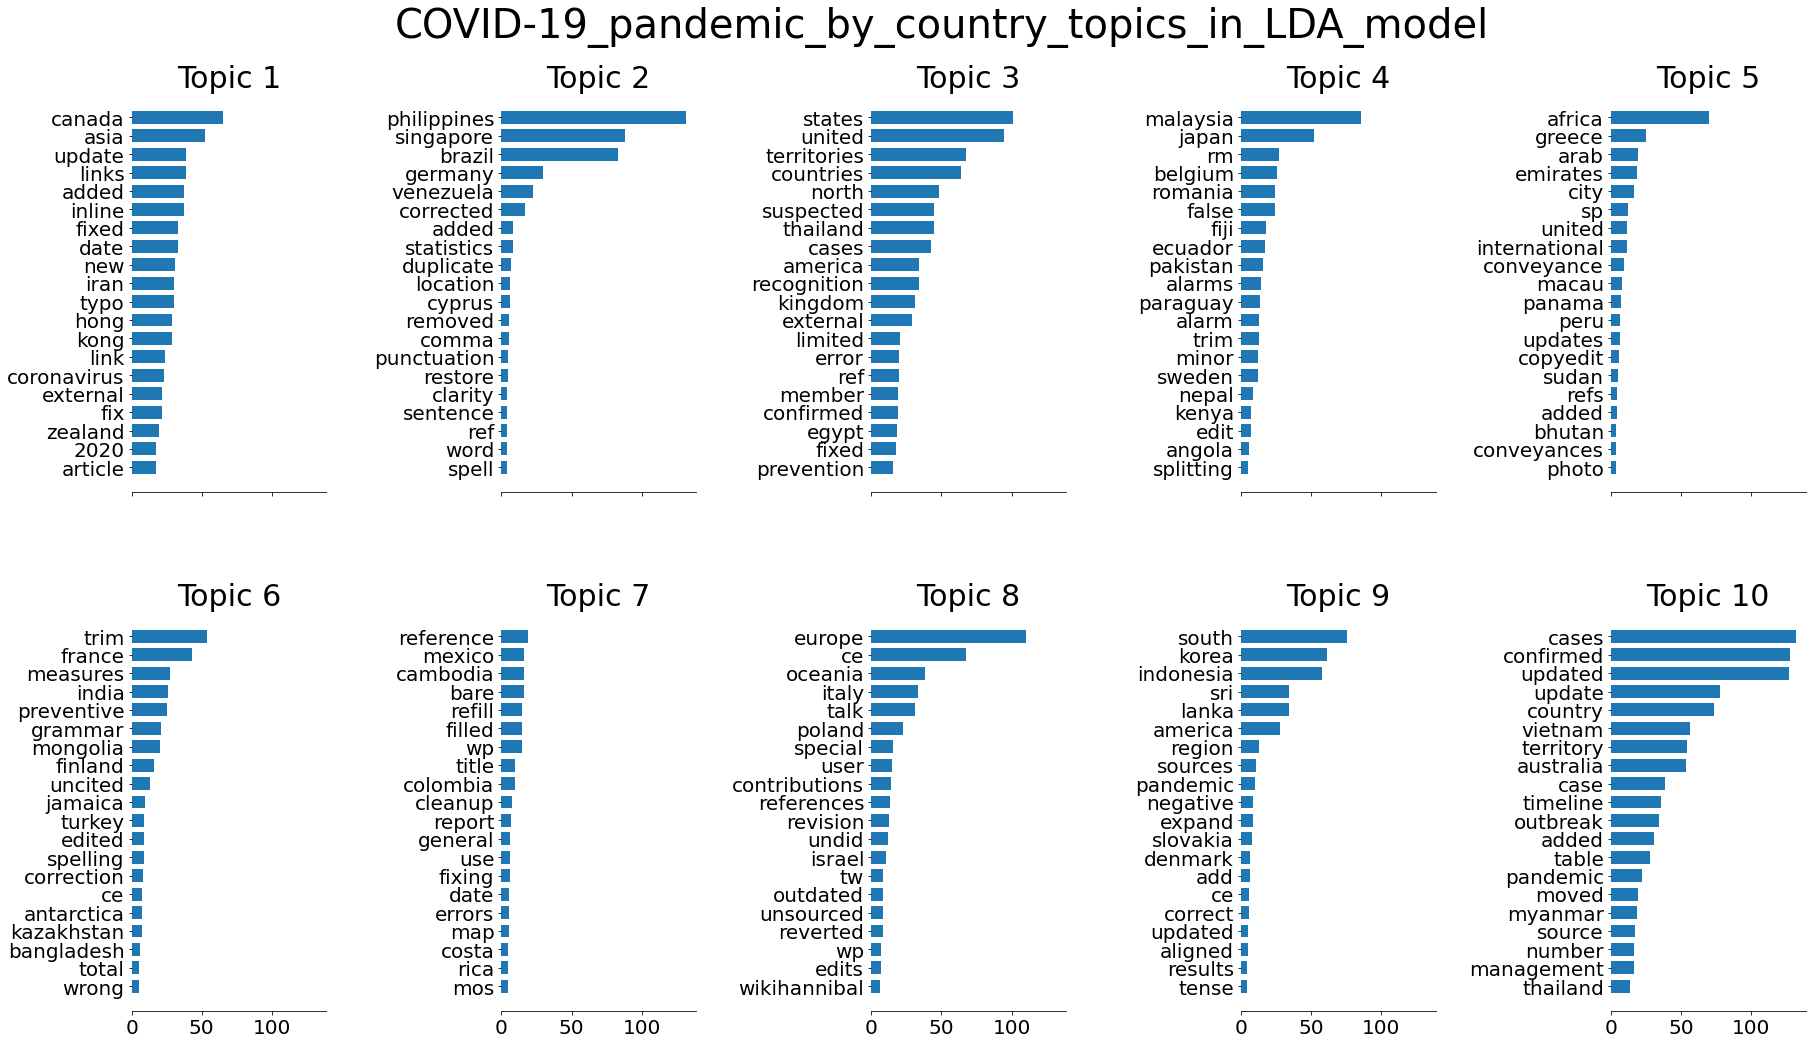

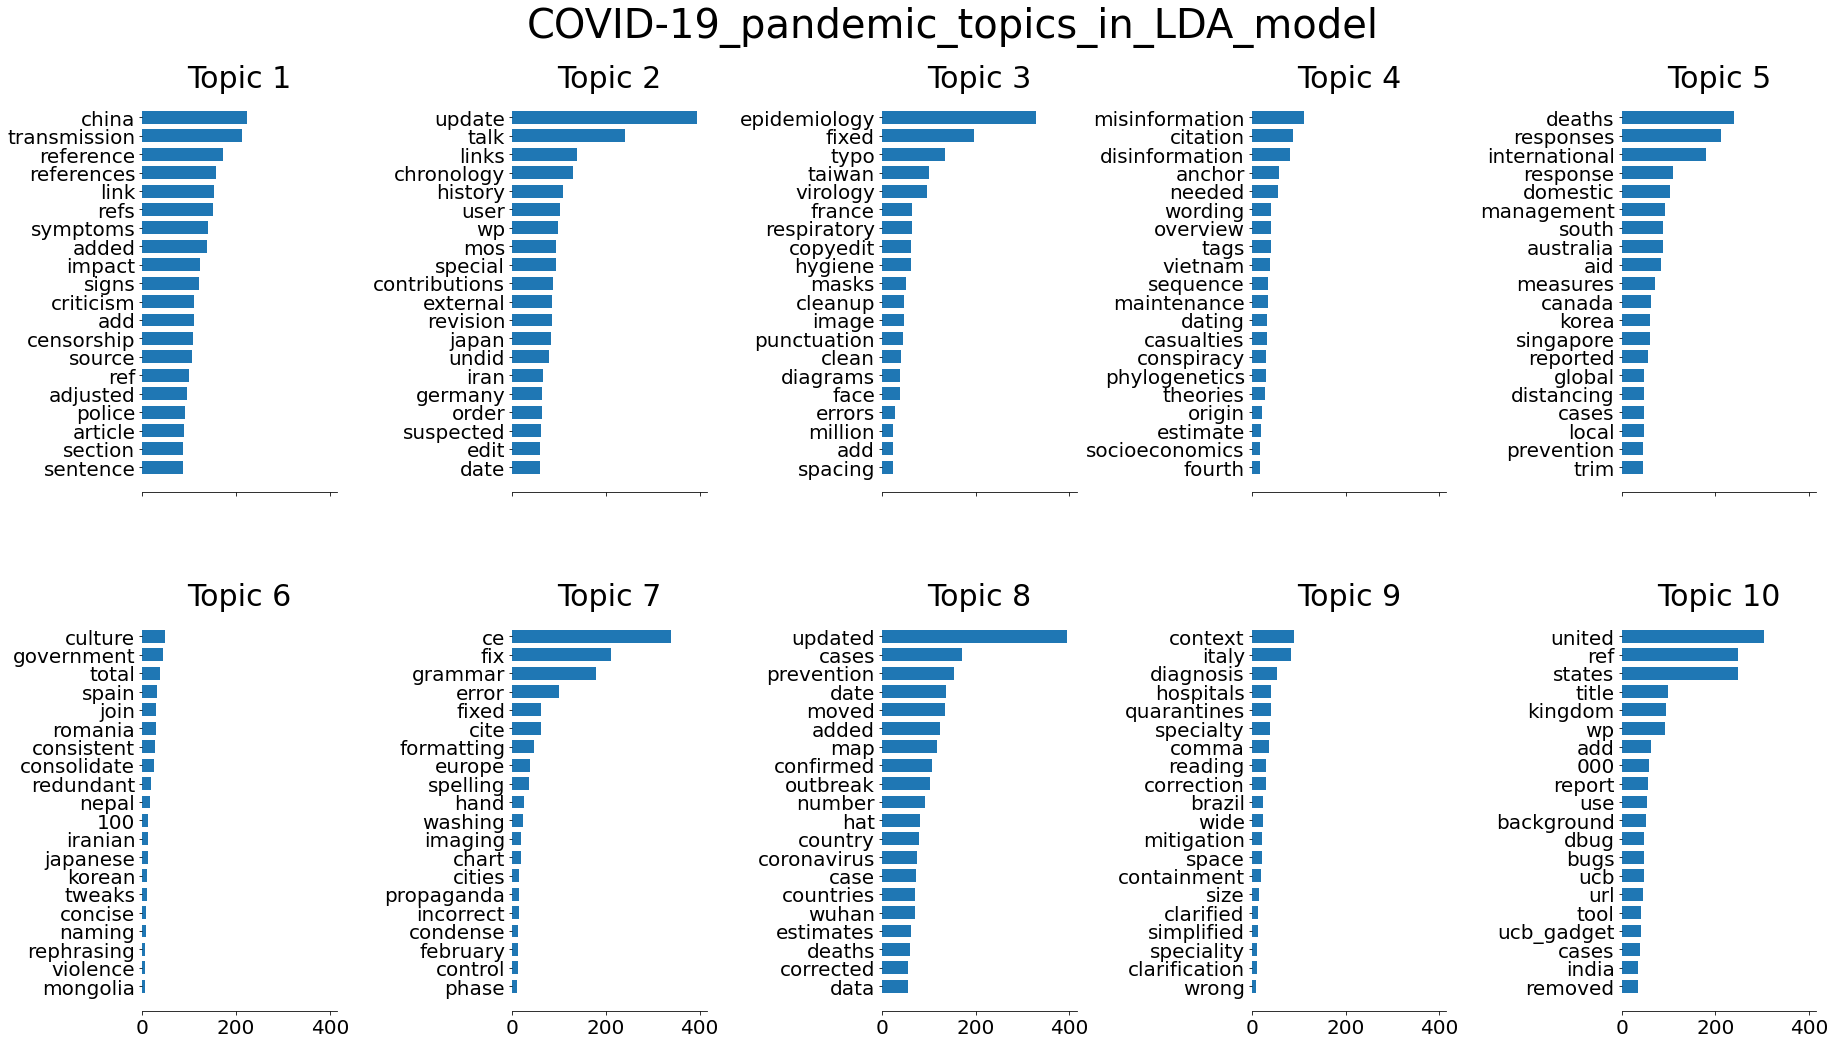

In [92]:
LDA(result, 'data/result')